In [ ]:
!pip install nltk
!pip install wordcloud
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re
import numpy as np
import pandas as pd
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ai_Dataset/Hotel_Reviews.csv')
df.head()


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
print(df.columns.tolist())

['Review', 'Rating']


In [ ]:
df.isnull().sum()

,0
Review,0
Rating,0


In [ ]:
num_rows = len(df)
print(f"Number of rows in the DataFrame: {num_rows}")

Number of rows in the DataFrame: 20491


In [ ]:
def lowercase(text):
    return text.lower()

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_mentions(text):
    return re.sub("@[A-Za-z0-9_]+", "", text)

def remove_emoji(string):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r' ', string)

def removeunwanted_characters(document):
  #remove floats
  document = re.sub("","", document)
  # remove hashtags
  document = re.sub("#[A-Za-z0-9_]+","", document)
  # remove punctuation
  document = re.sub("[^0-9A-Za-z ]", "" , document)
  #remove emojis
  document = remove_emoji(document)
  # remove double spaces
  document = document.replace('  ',"")
  return document.strip()

def remove_punctuation(text):
    special_characters = set(string.punctuation)
    return ''.join(char1 for char1 in text if char1 not in special_characters)

def remove_stopwords(text):
    stop = stopwords.words('english')
    return ' '.join([word for word in text.split() if word not in stop])

def remove_short_words(text):
    return ' '.join([w for w in text.split() if len(w) > 2])

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

In [ ]:
from tkinter.constants import E
def preprocess_text(text):
  if isinstance(text, str):
    text = lowercase(text)
    text = remove_urls(text)
    text = remove_mentions(text)
    text = remove_emoji(text)
    text = removeunwanted_characters(text)
    text = remove_stopwords(text)
    text = remove_short_words(text)
    text = lemmatize(text)
    return text
  else:
    return ""

In [ ]:
df['cleaned_text'] = df['Review'].apply(preprocess_text)

In [ ]:
df.head()



,Review,Rating,cleaned_text
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,nothing special charge diamond member hilton d...
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...


In [ ]:
df.columns.tolist()

['Review', 'Rating', 'cleaned_text']

In [ ]:
from tensorflow.keras.utils import to_categorical
from wordcloud import WordCloud

In [ ]:
from sklearn.model_selection import train_test_split
# Split FIRST (before tokenization)
X_train, X_test, y_train, y_test = train_test_split(
df['cleaned_text'], # Features (text)
df['Rating'], # Labels
test_size=0.2,
random_state=42
)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Use the same tokenizer to transform both sets
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
import numpy as np
seq_lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(seq_lengths, 95))

In [ ]:
seq_lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(seq_lengths, 95)) # Adjust percentile as needed
# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

In [ ]:
y_train_cat = to_categorical(y_train - 1, num_classes=5)
y_test_cat = to_categorical(y_test - 1, num_classes=5)

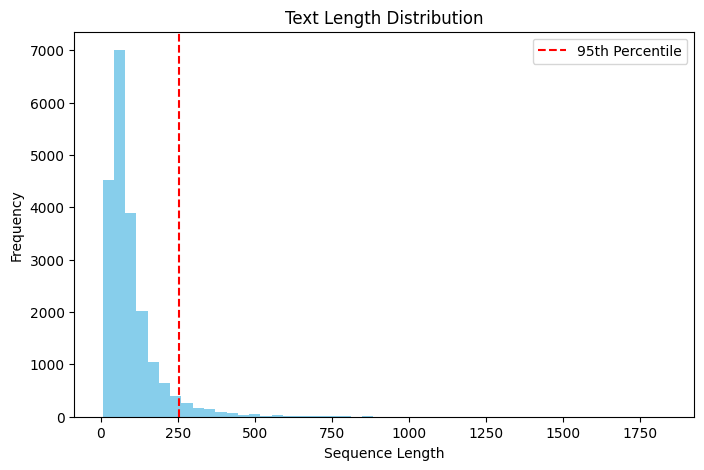

In [ ]:
import matplotlib.pyplot as plt
X_seq = tokenizer.texts_to_sequences(df['cleaned_text'])
seq_lengths = [len(seq) for seq in X_seq]
plt.figure(figsize=(8, 5))
plt.hist(seq_lengths, bins=50, color='skyblue')
plt.title('Text Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axvline(np.percentile(seq_lengths, 95), color='red', linestyle='dashed', label='95th Percentile'
)
plt.legend()
plt.show()

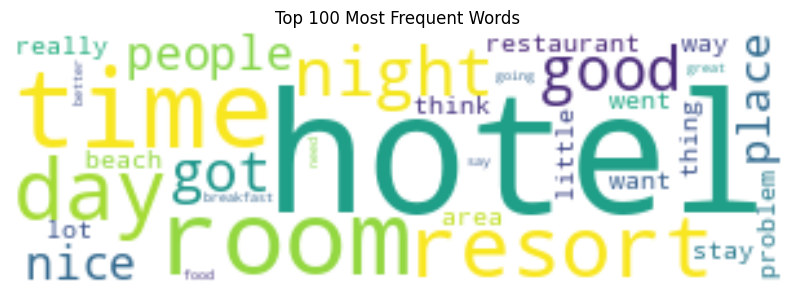

In [ ]:
all_words = ' '.join(df['cleaned_text'])
# Generate WordCloud with only top 100 words
wordcloud = WordCloud(
width=300,
height=100,
background_color='white',
max_words=100 # Limit to top 100 words
).generate(all_words)
# Plot settings
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 Most Frequent Words')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense,Flatten,Bidirectional,Dropout, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Model parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 200
rnn_units = 64

model_rnn = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len, embeddings_regularizer=l2(0.001)),

    Bidirectional(SimpleRNN(64, return_sequences=True, kernel_regularizer=l2(0.001), recurrent_regularizer=l2(0.001))),

    Dropout(0.4),

    GlobalMaxPooling1D(),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),

    Dense(5, activation='softmax', kernel_regularizer=l2(0.001))
])

# model_rnn = Sequential([
#     # Input/Embedding layer
#     Embedding(
#         input_dim=vocab_size,
#         output_dim=embedding_dim,
#         input_length=max_len,
#         # embeddings_regularizer=l2(0.001)
#     ),

#     SimpleRNN(128),

#     # Bidirectional SimpleRNN layer
#     # SimpleRNN(
#     #     128,
#     #     return_sequences=True,
#     #     kernel_regularizer=l2(0.001),
#     #     recurrent_regularizer=l2(0.001)
#     # ),

#     # Add dropout
#     # Dropout(0.5),

#     # SimpleRNN(
#     #     64,
#     #     return_sequences=True,
#     #     kernel_regularizer=l2(0.001),
#     #     recurrent_regularizer=l2(0.001)
#     # ),

#     # Flatten the output
#     # Flatten(),

#     # Add another dropout
#     # Dropout(0.5),

#     # Output layer
#     Dense(5,
#           activation='softmax',
#           # kernel_regularizer=l2(0.001)
#           )
# ])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_rnn.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_rnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
from sklearn.utils import resample

# Your original balanced dataset function (keep this)
def create_balanced_dataset(X, y, samples_per_class=800):
    """
    Create a balanced dataset with equal samples per class.

    Parameters:
    -----------
    X : numpy array
        Feature matrix (e.g., padded sequences)
    y : numpy array
        One-hot encoded labels
    samples_per_class : int, optional (default=800)
        Number of samples to include for each class

    Returns:
    --------
    X_balanced : numpy array
        Balanced feature matrix
    y_balanced : numpy array
        Balanced one-hot encoded labels
    """
    # Initialize empty lists for balanced dataset
    X_balanced = []
    y_balanced = []

    # Get class indices from one-hot encoded labels
    y_indices = np.argmax(y, axis=1)

    # Number of classes
    num_classes = y.shape[1]

    # Print original class distribution
    original_dist = np.bincount(y_indices)
    print(f"Original class distribution: {original_dist}")

    # Balance each class
    for class_idx in range(num_classes):
        # Find indices of samples belonging to this class
        indices = np.where(y_indices == class_idx)[0]

        # Skip if no samples for this class
        if len(indices) == 0:
            print(f"Warning: No samples found for class {class_idx}")
            continue

        # If we have more samples than needed, undersample
        if len(indices) > samples_per_class:
            # Randomly select samples_per_class samples without replacement
            selected_indices = np.random.choice(indices, size=samples_per_class, replace=False)
        # If we have fewer samples than needed, oversample
        else:
            # Randomly select samples_per_class samples with replacement
            selected_indices = np.random.choice(indices, size=samples_per_class, replace=True)

        # Extract selected samples and their labels
        selected_X = X[selected_indices]
        selected_y = y[selected_indices]

        # Add to balanced dataset
        X_balanced.extend(selected_X)
        y_balanced.extend(selected_y)

    # Convert lists to numpy arrays
    X_balanced = np.array(X_balanced)
    y_balanced = np.array(y_balanced)

    # Shuffle the balanced dataset
    shuffle_indices = np.random.permutation(len(X_balanced))
    X_balanced = X_balanced[shuffle_indices]
    y_balanced = y_balanced[shuffle_indices]

    # Print balanced class distribution
    balanced_indices = np.argmax(y_balanced, axis=1)
    balanced_dist = np.bincount(balanced_indices)
    print(f"Balanced class distribution: {balanced_dist}")

    return X_balanced, y_balanced

# Balance the training set
X_train_main, X_val, y_train_main, y_val = train_test_split(X_train_pad, y_train_cat, test_size=0.1, stratify=np.argmax(y_train_cat, axis=1))

X_train_balanced, y_train_balanced = create_balanced_dataset(X_train_pad, y_train_cat)

# Balance the test set (use a smaller number of samples per class)
X_test_balanced, y_test_balanced = create_balanced_dataset(X_test_pad, y_test_cat, samples_per_class=200)

# Now you can use both balanced datasets
print(f"Balanced training set shape: {X_train_balanced.shape}")
print(f"Balanced test set shape: {X_test_balanced.shape}")

Original class distribution: [1129 1460 1752 4787 7264]
Balanced class distribution: [800 800 800 800 800]
Original class distribution: [ 292  333  432 1252 1790]
Balanced class distribution: [200 200 200 200 200]
Balanced training set shape: (4000, 255)
Balanced test set shape: (1000, 255)


In [ ]:
# Train on the balanced dataset
history_rnn = model_rnn.fit(
    # X_train_balanced, y_train_balanced,
    X_train_pad, y_train_cat,
    # validation_split=0.15,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)

Epoch 1/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.3992 - loss: 8.2414 - val_accuracy: 0.4780 - val_loss: 2.7035
Epoch 2/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.4802 - loss: 2.4583 - val_accuracy: 0.4549 - val_loss: 2.2763
Epoch 3/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.5109 - loss: 2.0346 - val_accuracy: 0.5457 - val_loss: 1.9104
Epoch 4/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.5531 - loss: 1.8019 - val_accuracy: 0.6433 - val_loss: 1.7001
Epoch 5/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.5976 - loss: 1.6444 - val_accuracy: 0.6683 - val_loss: 1.5624
Epoch 6/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.6418 - loss: 1.4779 - val_accuracy: 0.7220 - val_loss: 1.4473
Epoch 7/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.6157 - loss: 1.5051 - val_accuracy: 0.6951 - val_loss: 1.3832
Epoch 8/10
513/513 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.6853 - loss: 1.3287 - 

In [ ]:
# Evaluate the RNN model on the test set
# test_loss_rnn, test_acc_rnn = model_rnn.evaluate(X_test_balanced, y_test_balanced, verbose=1)
test_loss_rnn, test_acc_rnn = model_rnn.evaluate(X_test_pad, y_test_cat, verbose=0)
# test_loss_rnn, test_acc_rnn = model_rnn.evaluate(X_train_pad, y_train_cat, verbose=1)


# Print the test accuracy
print(f"RNN Test Accuracy on original test set: {test_acc_rnn:.4f}")
# print(f"RNN Test Loss on original test set: {test_loss_rnn:.4f}")


RNN Test Accuracy on original test set: 0.6189


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Make predictions on the balanced training set
y_pred_rnn_balanced = model_rnn.predict(X_test_balanced)
y_pred_classes_rnn_balanced = np.argmax(y_pred_rnn_balanced, axis=1)
y_true_classes_rnn_balanced = np.argmax(y_test_balanced, axis=1)

# Generate and print the classification report for the balanced training data
report_rnn_balanced = classification_report(y_true_classes_rnn_balanced, y_pred_classes_rnn_balanced, target_names=[str(i + 1) for i in range(5)])
print("\nClassification Report for RNN Model on Balanced Training Data:")
print(report_rnn_balanced)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step

Classification Report for RNN Model on Balanced Training Data:
              precision    recall  f1-score   support

           1       0.74      0.61      0.67       200
           2       0.46      0.41      0.43       200
           3       0.47      0.31      0.37       200
           4       0.44      0.58      0.51       200
           5       0.63      0.82      0.71       200

    accuracy                           0.55      1000
   macro avg       0.55      0.55      0.54      1000
weighted avg       0.55      0.55      0.54      1000



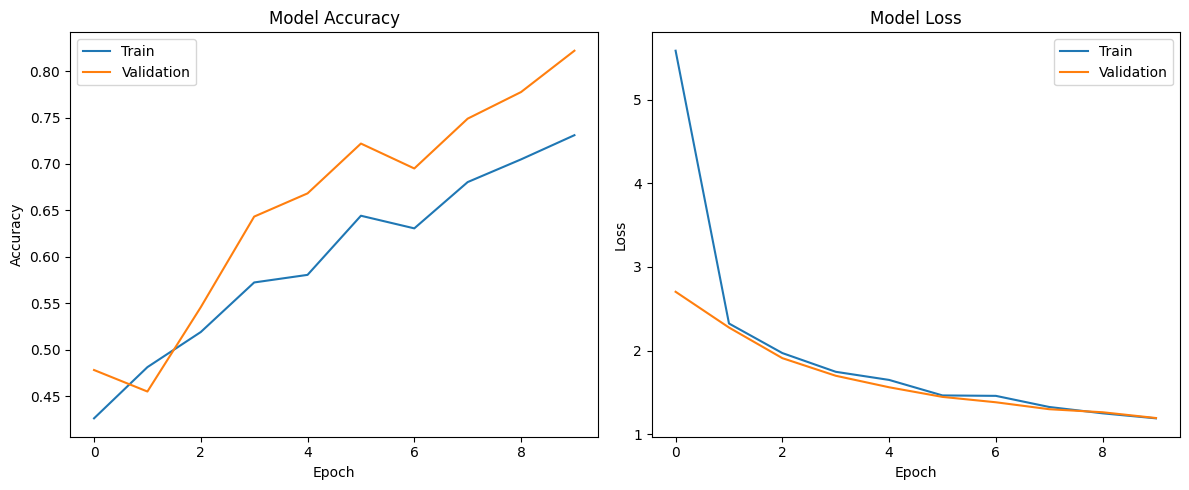

In [ ]:
import matplotlib.pyplot as plt
# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)  # Create the first subplot for accuracy
plt.plot(history_rnn.history['accuracy'], label='Train')
plt.plot(history_rnn.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'], label='Train')
plt.plot(history_rnn.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional, LayerNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
# Also import metrics if needed later
from tensorflow.keras.metrics import Precision, Recall
max_words = 10000
max_len = 100
vocab_size = min(max_words, len(tokenizer.word_index) + 1)

model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    SpatialDropout1D(0.4),

    Bidirectional(LSTM(64, return_sequences=True,
                      kernel_regularizer=l2(0.01),
                      recurrent_dropout=0.2)),
    LayerNormalization(),

    Bidirectional(LSTM(64,
                      kernel_regularizer=l2(0.01),
                      recurrent_dropout=0.2)),
    Dropout(0.6),

    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(5, activation='softmax')
])

model_lstm.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

model_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization             │ ?                      │   0 (unbuilt) │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                            patience=2, min_lr=1e-5)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_lstm = model_lstm.fit(
    X_train_balanced,
    y_train_balanced,
    validation_split=0.15,
    epochs=10,
    batch_size=64,
    callbacks=[early_stop]
)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.2181 - loss: 7.7869 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.3150 - val_loss: 4.3155 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.3916 - loss: 3.6785 - precision: 0.5702 - recall: 0.0590 - val_accuracy: 0.4317 - val_loss: 2.4493 - val_precision: 0.5151 - val_recall: 0.2850
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.5427 - loss: 2.0861 - precision: 0.6727 - recall: 0.3320 - val_accuracy: 0.4700 - val_loss: 1.8760 - val_precision: 0.5545 - val_recall: 0.2800
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 205s 3s/step - accuracy: 0.6619 - loss: 1.4665 - precision: 0.7283 - recall: 0.5051 - val_accuracy: 0.4767 - val_loss: 1.7735 - val_precision: 0.5089 - val_recall: 0.4283
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.7300 - loss: 1.1289 - precision: 0.7637 - recall: 0.6611 - val_accuracy: 0.4700 - v

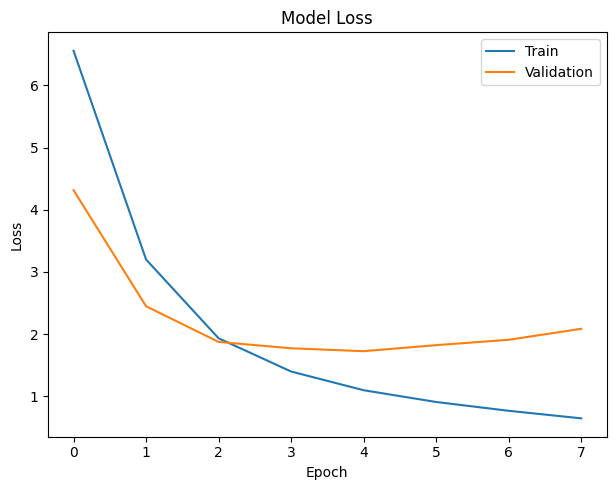

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Train')
plt.plot(history_lstm.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

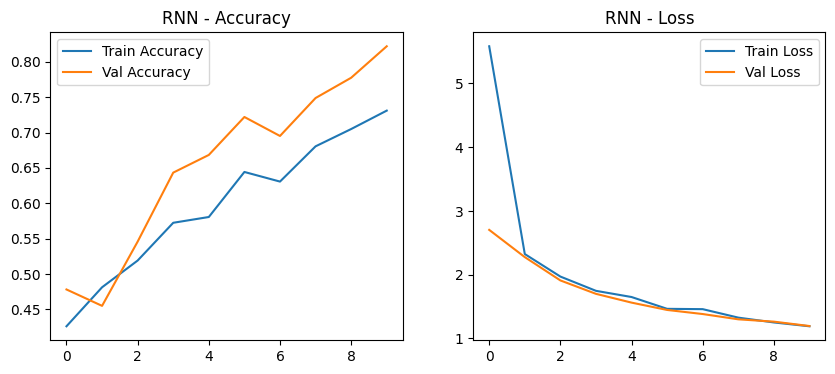

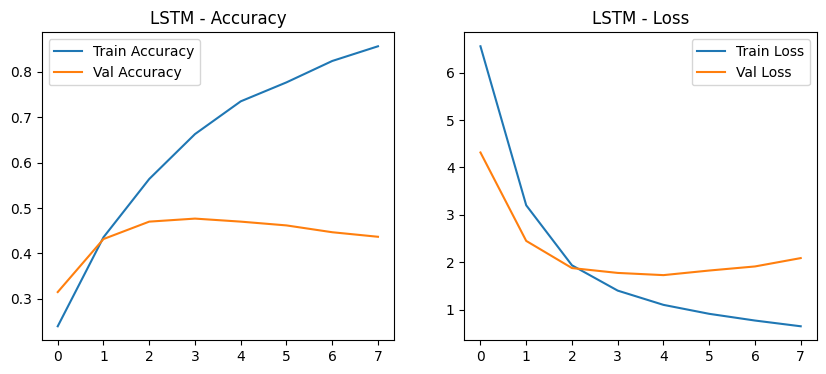

In [ ]:
 # Function to plot
def plot_history(history, title="Model"):
    plt.figure(figsize=(10, 4))
 # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()

# Plot for RNN Model
plot_history(history_rnn, title="RNN")

# Plot for LSTM Model
plot_history(history_lstm, title="LSTM")

In [ ]:
!pip install numpy
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 req

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

## Load and Explore Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ai_Dataset/Hotel_Reviews.csv')

# Explore the dataset
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 samples:")
print(df.head())

# Check class distribution
print("\nRating distribution:")
print(df['Rating'].value_counts().sort_index())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic statistics:")
print(df.describe())

Dataset shape: (20491, 2)

First 5 samples:
                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

Rating distribution:
Rating
1    1421
2    1793
3    2184
4    6039
5    9054
Name: count, dtype: int64

Missing values:
Review    0
Rating    0
dtype: int64

Basic statistics:
             Rating
count  20491.000000
mean       3.952223
std        1.233030
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000


## Preprocess Text Data

## Download and Load Word2Vec Model

In [ ]:
import os
import gensim.downloader as api

# This downloads and caches the model using gensim's built-in API
print("Downloading Word2Vec model using gensim's downloader (will take time)...")
word2vec_model = api.load("word2vec-google-news-300")
print("Model loaded successfully!")

# Define the directory path
save_dir = "gensim-data"

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    print(f"Created directory: {save_dir}")

# Save the model for future use
# Save the model to the created directory
word2vec_model.save(os.path.join(save_dir, "word2vec.model"))
print(f"Model saved to: {os.path.join(save_dir, 'word2vec.model')}")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Model loaded successfully!
Created directory: gensim-data
Model saved to: gensim-data/word2vec.model


## Loading Pre-trained Word Embeddings

In [ ]:
from gensim.models import KeyedVectors
import numpy as np

# Try loading the Word2Vec model (try each file until one works)
try:
    print("Loading Word2Vec model from GoogleNews-vectors-negative300.bin.gz...")
    word2vec_model = KeyedVectors.load_word2vec_format(
        "gensim-data/GoogleNews-vectors-negative300.bin.gz",
        binary=True,
        limit=100000  # Limit to first 100k vectors to save memory
    )
    print("Successfully loaded from .bin.gz file")
except Exception as e:
    print(f"Error loading .bin.gz file: {e}")
    try:
        print("Trying to load from word2vec.model...")
        word2vec_model = KeyedVectors.load("gensim-data/word2vec.model")
        print("Successfully loaded from .model file")
    except Exception as e2:
        print(f"Error loading .model file: {e2}")
        raise Exception("Could not load Word2Vec model from any file")

# Verify model loaded correctly
print(f"Model contains {len(word2vec_model.key_to_index)} word vectors")

# Test with a few sample words
test_words = ["hotel", "good", "bad", "clean", "service"]
for word in test_words:
    if word in word2vec_model:
        print(f"'{word}' is in vocabulary")
    else:
        print(f"'{word}' is NOT in vocabulary")

Loading Word2Vec model from GoogleNews-vectors-negative300.bin.gz...
Error loading .bin.gz file: [Errno 2] No such file or directory: 'gensim-data/GoogleNews-vectors-negative300.bin.gz'
Trying to load from word2vec.model...
Successfully loaded from .model file
Model contains 3000000 word vectors
'hotel' is in vocabulary
'good' is in vocabulary
'bad' is in vocabulary
'clean' is in vocabulary
'service' is in vocabulary


## Creating Embedding Matrix

In [ ]:
# Create embedding matrix from Word2Vec vectors
vocab_size = min(10000, len(tokenizer.word_index)) + 1
embedding_dim = 300
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Fill embedding matrix with Word2Vec vectors
found = 0
for word, i in tokenizer.word_index.items():
    if i >= vocab_size:
        continue
    if word in word2vec_model:
        embedding_matrix[i] = word2vec_model[word]
        found += 1

print(f"Found {found} word vectors out of {vocab_size} tokens.")
print(f"Word coverage: {found/vocab_size:.2%}")

Found 8566 word vectors out of 10001 tokens.
Word coverage: 85.65%


In [ ]:
vocab_size = min(10000, len(tokenizer.word_index)) + 1
print(f"Vocabulary size: {vocab_size}")


embedding_dim = 300
embedding_matrix = np.zeros((vocab_size, embedding_dim))


found = 0
for word, i in tokenizer.word_index.items():
    if i >= vocab_size:
        continue
    if word in word2vec_model:
        embedding_matrix[i] = word2vec_model[word]
        found += 1

print(f"Found {found} word vectors out of {vocab_size} tokens.")
print(f"Embedding matrix shape: {embedding_matrix.shape}")



Vocabulary size: 10001
Found 8566 word vectors out of 10001 tokens.
Embedding matrix shape: (10001, 300)


## Build SimpleRNN Model with Word2Vec Embeddings


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2 # Ensure l2 is imported

model = Sequential([
    # Embedding layer - use default name to avoid issues
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=max_len,
        trainable=False
    ),
    SpatialDropout1D(0.51),

    # Increase LSTM capacity
    Bidirectional(LSTM(
        64,
        return_sequences=True,
        kernel_regularizer=l2(0.001),
        recurrent_regularizer=l2(0.001)
    )),
    Dropout(0.5),

    Flatten(),

    # Add another dense layer for better feature extraction
    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(32, activation='relu'),
    Dropout(0.5),

    # Output layer
    Dense(5, activation='softmax')
])

# Compile with slightly higher learning rate
model.compile(
    optimizer=Adam(learning_rate=0.00025),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)        │ ?                      │     3,000,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_17            │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_17                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,000,300 (11.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,000,300 (11.45 MB)

## Training THe MOdel


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=7,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.0001,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'best_model.keras',  # Use .keras extension as recommended
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Train model
history = model.fit(
    X_train_balanced, y_train_balanced,
    epochs=20,
    batch_size=32,
    # validation_split=0.2,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)


print("Making embeddings trainable for fine-tuning...")

model.layers[0].trainable = True

# Recompile with lower learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tuning with trainable embeddings
history2 = model.fit(
    X_train_balanced, y_train_balanced,
    epochs=10,
    batch_size=32,
    # validation_split=0.2,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)


Epoch 1/20
123/125 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2089 - loss: 2.2364
Epoch 1: val_accuracy improved from -inf to 0.41463, saving model to best_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.2094 - loss: 2.2348 - val_accuracy: 0.4146 - val_loss: 2.0069 - learning_rate: 2.5000e-04
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2818 - loss: 1.9706
Epoch 2: val_accuracy improved from 0.41463 to 0.47012, saving model to best_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.2819 - loss: 1.9701 - val_accuracy: 0.4701 - val_loss: 1.6677 - learning_rate: 2.5000e-04
Epoch 3/20
123/125 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3616 - loss: 1.7318
Epoch 3: val_accuracy improved from 0.47012 to 0.51646, saving model to best_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.3615 - loss: 1.7309 - val_accuracy: 0.5165 - val_loss: 1.4678 - learning_rate: 2.5000e-04
Epoch 4/20
123/125 ━━━━━━━━━━━━━━━━━

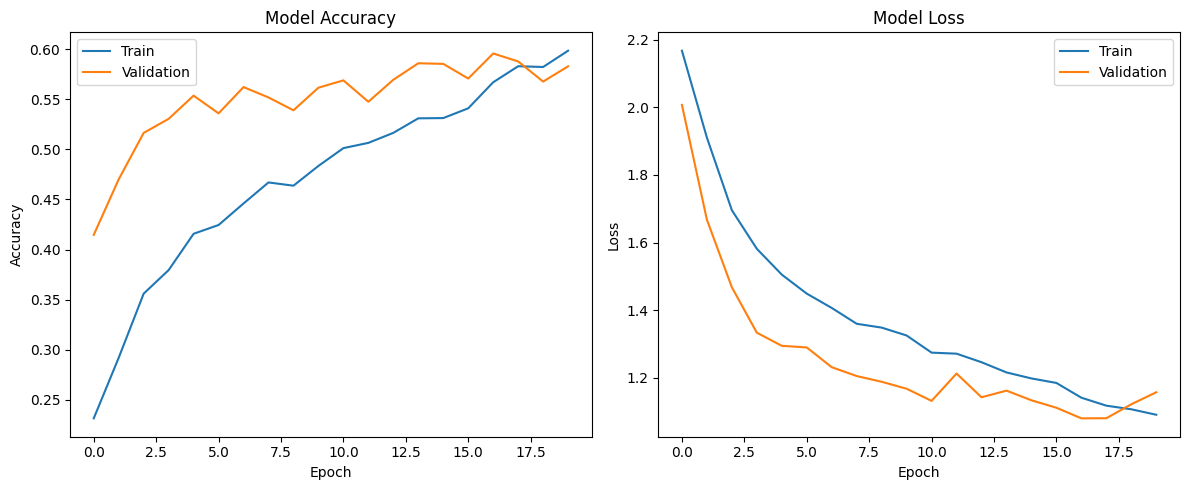

In [ ]:
b# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Evaluating model on balanced test set...
Test Loss: 1.0990
Test Accuracy: 0.5630
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.71      0.71       200
           2       0.47      0.52      0.49       200
           3       0.48      0.40      0.43       200
           4       0.46      0.47      0.47       200
           5       0.68      0.71      0.70       200

    accuracy                           0.56      1000
   macro avg       0.56      0.56      0.56      1000
weighted avg       0.56      0.56      0.56      1000


Confusion Matrix:


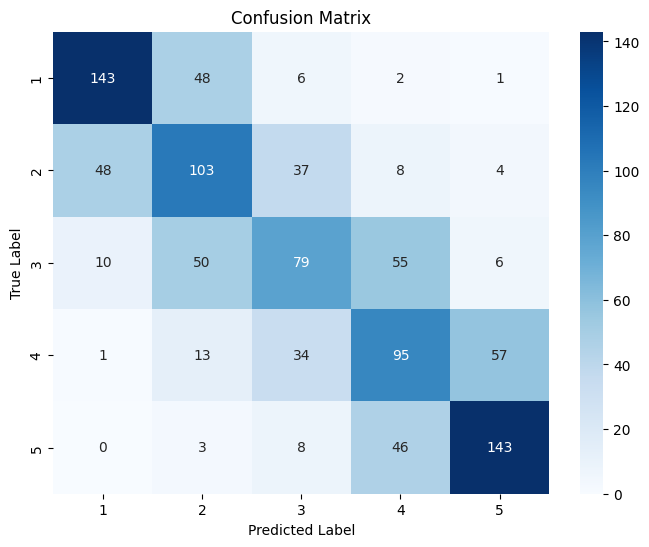

In [ ]:
# prompt: accurassy , clasification and confusinon matrix for this

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Evaluate the final fine-tuned model on the balanced test set
print("\nEvaluating model on balanced test set...")
loss, accuracy = model.evaluate(X_test_balanced, y_test_balanced, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions on the balanced test set
y_pred_probs = model.predict(X_test_balanced)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Get the true classes from the one-hot encoded labels
y_true_classes = np.argmax(y_test_balanced, axis=1)

# Print Classification Report
print("\nClassification Report:")
# target_names should correspond to the actual ratings (1 to 5)
target_names = [str(i + 1) for i in range(5)]
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

# Print Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
